In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
rewards_dqn_v1 = np.loadtxt('../outputs/dqn-v1-test.txt')
rewards_dqn_v2 = np.loadtxt('../outputs/dqn-v2-test.txt')
rewards_dqn_v3 = np.loadtxt('../outputs/dqn-v3-test.txt')
rewards_dqn_v4 = np.loadtxt('../outputs/dqn-v4-test.txt')
rewards_dqn_v5 = np.loadtxt('../outputs/dqn-v5-test.txt')
rewards_td_v1 = np.loadtxt('../outputs/td-v1.txt')
rewards_td_v2 = np.loadtxt('../outputs/td-v2.txt')
rewards_td_v3 = np.loadtxt('../outputs/td-v3.txt')
rewards_td_v4 = np.loadtxt('../outputs/td-v4.txt')
rewards_random = np.loadtxt('../outputs/random.txt')

In [3]:
def running_average(window_size, data):
    average_data = []
    for ind in range(len(data) - window_size + 1):
        average_data.append(np.mean(data[ind:ind+window_size]))
    for ind in range(window_size - 1):
        average_data.insert(0, np.nan)
    return average_data

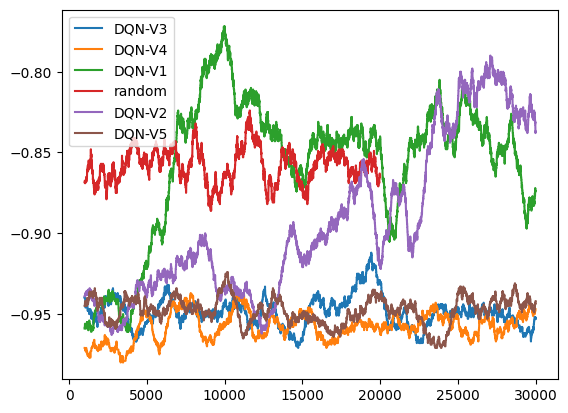

In [32]:
plt.plot(running_average(1000,rewards_dqn_v3), label='DQN-V3')
plt.plot(running_average(1000,rewards_dqn_v4), label='DQN-V4')
plt.plot(running_average(1000,rewards_dqn_v1), label='DQN-V1')
plt.plot(running_average(1000, rewards_random), label='random')
plt.plot(running_average(1000,rewards_dqn_v2), label='DQN-V2')
plt.plot(running_average(1000, rewards_dqn_v5), label='DQN-V5')
plt.legend()

In [29]:
def plot_running_averages():
    plt.plot(running_average(500,rewards_dqn_v1), label='DQN-V1')
    plt.plot(running_average(500,rewards_dqn_v2), label='DQN-V2')
    plt.plot(running_average(500,rewards_td_v1), label='TD-V1')
    plt.plot(running_average(500,rewards_td_v2), label='TD-V2')
    plt.plot(running_average(500,rewards_td_v3), label='TD-V3')
    plt.plot(running_average(500,rewards_td_v4), label='TD-V4')
    plt.plot(running_average(500,rewards_random), label='Random agent')
    plt.legend()
    plt.title('Moving Average of cumulative rewards per episode')
    plt.xlabel('Number of episodes')
    plt.ylabel('Cumulative reward')
    plt.margins()

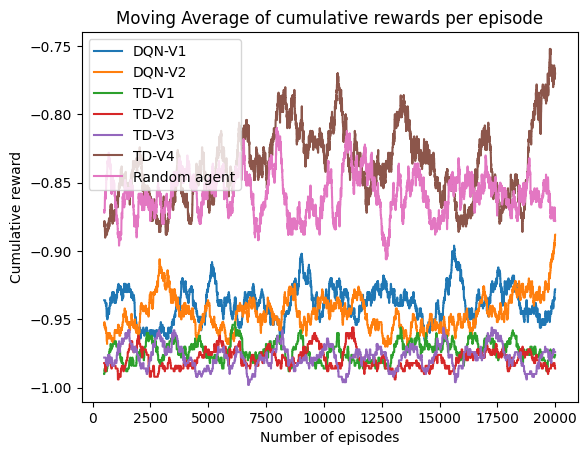

In [30]:
plot_running_averages()

In [68]:
def plot_reward_distribution(data, agent):
    plt.hist(data)
    plt.title(f'Reward distribution for {agent}')

Text(0.5, 0, 'Reward')

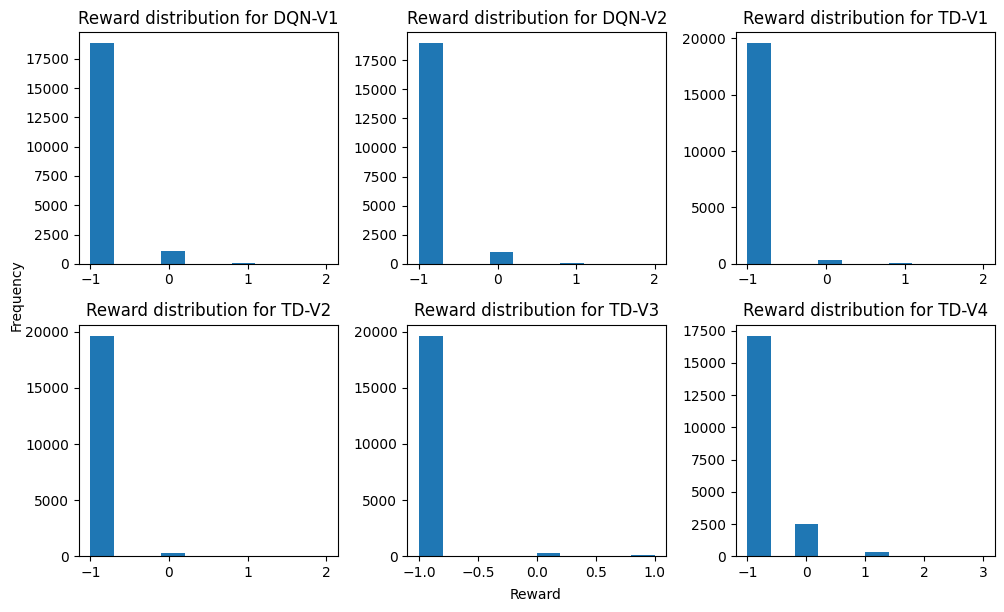

In [90]:
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
plot_reward_distribution(rewards_dqn_v1, 'DQN-V1')
plt.subplot(2,3,2)
plot_reward_distribution(rewards_dqn_v2, 'DQN-V2')
plt.subplot(2,3,3)
plot_reward_distribution(rewards_td_v1, 'TD-V1')
plt.subplot(2,3,4)
plot_reward_distribution(rewards_td_v2, 'TD-V2')
plt.subplot(2,3,5)
plot_reward_distribution(rewards_td_v3, 'TD-V3')
plt.subplot(2,3,6)
plot_reward_distribution(rewards_td_v4, 'TD-V4')
plt.tight_layout()
plt.figtext(0,0.5, 'Frequency', va='center', rotation='vertical')
plt.figtext(0.5,00, 'Reward', va='center', rotation='horizontal')
